# 1A.algo : Recherche dichotomique

Recherche dichotomique illustrée. Extrait de [Recherche dichotomique, récursive, itérative et le logarithme](http://www.xavierdupre.fr/blog/2013-12-01_nojs.html).

In [ ]:
from jyquickhelper import add_notebook_menu
add_notebook_menu()

Lorsqu'on décrit n'importe quel algorithme, on évoque toujours son coût, souvent une formule de ce style :

$$O(n^u(\ln_2 n)^v)$$

$u$ et $v$ sont des entiers. $v$ est souvent soit 0, soit 1. Mais d'où vient ce logarithme ? Le premier algorithme auquel on pense et dont le coût correspond au cas $u=0$ et $v=1$ est la recherche dichotomique. Il consiste à chercher un élément dans une liste triée. Le logarithme vient du fait qu'on réduit l'espace de recherche par deux à chaque itération. Fatalement, on trouve très vite l'élément à chercher. Et le logarithme, dans la plupart des algorithmes, vient du fait qu'on divise la dimension du problème par un nombre entier à chaque itération, ici 2.

La recherche dichotomique est assez simple : on part d'une liste triée ``T`` et on cherche l'élément ``v`` (on suppose qu'il s'y trouve). On procède comme suit :

* On compare ``v`` à l'élément du milieu de la liste.
* S'il est égal à ``v``, on a fini.
* Sinon, s'il est inférieur, il faut chercher dans la première moitié de la liste. On retourne à l'étape 1 avec la liste réduite.
* S'il est supérieur, on fait de même avec la seconde moitié de la liste.

C'est ce qu'illustre la figure suivante où ``a`` désigne le début de la liste, ``b`` la fin, ``m`` le milieu. A chaque itération, on déplace ces trois positions.

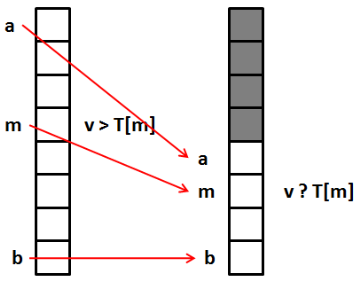

In [ ]:
from pyquickhelper.helpgen import NbImage
NbImage("images/dicho.png")

## Version itérative

In [ ]:
def recherche_dichotomique(element, liste_triee):
    a = 0
    b = len(liste_triee)-1
    m = (a+b)//2
    while a < b :
        if liste_triee[m] == element:
            return m
        elif liste_triee[m] > element:
            b = m-1
        else :
            a = m+1
        m = (a+b)//2
    return a

In [ ]:
li = [0, 4, 5, 19, 100, 200, 450, 999]
recherche_dichotomique(5, li)

2

## Version récursive

In [ ]:
def recherche_dichotomique_recursive( element, liste_triee, a = 0, b = -1 ):
    if a == b : 
        return a
    if b == -1 : 
        b = len(liste_triee)-1
    m = (a+b)//2
    if liste_triee[m] == element:
        return m
    elif liste_triee[m] > element:
        return recherche_dichotomique_recursive(element, liste_triee, a, m-1)
    else :
        return recherche_dichotomique_recursive(element, liste_triee, m+1, b)

In [ ]:
recherche_dichotomique(5, li)

2

## Version récursive 2

L'ajout des parametrès ``a`` et ``b`` peut paraître un peu lourd. Voici une troisième implémentation en Python (toujours récursive) :

In [ ]:
def recherche_dichotomique_recursive2(element, liste_triee):
    if len(liste_triee)==1 :
        return 0
    m = len(liste_triee)//2
    if liste_triee[m] == element:
        return m
    elif liste_triee[m] > element:
        return recherche_dichotomique_recursive2(element, liste_triee[:m])
    else :
        return m + recherche_dichotomique_recursive2(element, liste_triee[m:])

In [ ]:
recherche_dichotomique(5, li)

2

Il ne faut pas oublier ``m +`` sinon le résultat peut être décalé dans certains cas. Ensuite, cette version sera un peu moins rapide du fait de la recopie d'une partie de la liste.